# 회귀모델

In [1]:
import pandas as pd
perch = pd.read_csv("Data/perch.csv")
perch

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


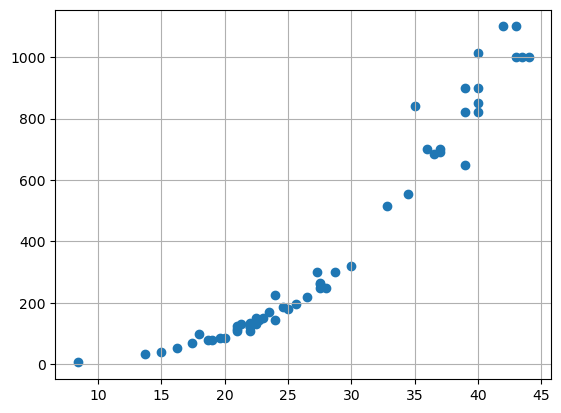

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch["length"], perch["weight"])
plt.grid()
plt.show()

In [7]:
X = perch[["length"]].values     # 문제집이 2차원이어야한다
Y = perch["weight"].values
X.shape, Y.shape

((56, 1), (56,))

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [21]:
# 무게데이터밖에 없어서? 굳이 데이터 표준화는 안해줘도 된다    ->   X에 해당하는 변수가 여러개일때 표준화가 필요한듯

from sklearn.neighbors import KNeighborsRegressor      # 회귀모델 불러옴
model = KNeighborsRegressor(n_neighbors=3)
model.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 시험데이터의 성능이 더 높게 나오면 과소적합됐다고 판단

0.9800145083705013
0.9660580958625924


In [23]:
pred = model.predict(train_x)
pred      # 예측값
train_y   # 실제값

array([ 125. ,  650. ,   80. ,  300. ,  120. ,   78. ,  180. ,   32. ,
        260. ,  820. ,  145. ,  250. ,  130. ,  700. , 1000. ,   40. ,
       1000. ,   85. ,  135. ,  690. ,  514. , 1100. ,  120. ,  850. ,
        100. ,  840. ,    5.9,  250. ,  150. ,  130. ,  900. ,   70. ,
        170. ,  110. , 1015. ,  110. ,  130. ,   85. ,  225. ,   51.5,
        197. ,  150. ])

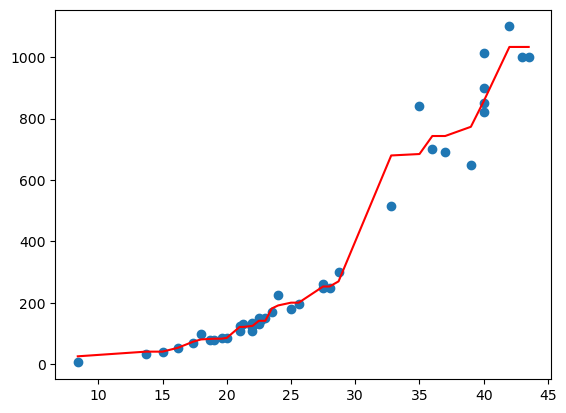

In [24]:
plt.scatter(train_x, train_y)
plt.plot(sorted(train_x), sorted(pred), color = "red")

# 이웃숫자가 너무 작으면 각지고, 너무 크면 완만해져서 작아도 안되고 커도 안됨
# 이웃숫자가 너무 크면  훈련데이터엔 잘맞는데 시험데이터엔 안맞는 현상 발생 = 과대적합

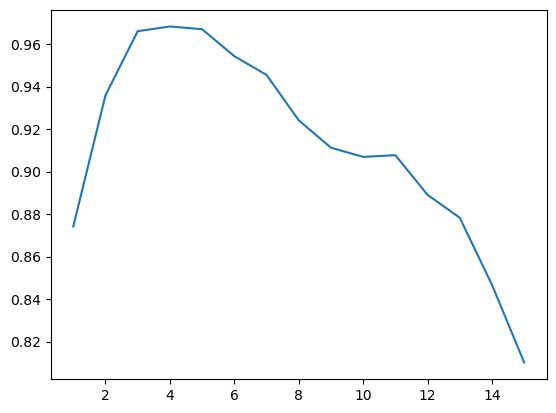

In [26]:
box = []
for n in range(1,16):
    model.n_neighbors = n
    score = model.score(test_x, test_y)
    box.append(score)

plt.plot(range(1,16), box)
plt.show()

# 5~6개정도로 맞춰주면 좋은 결과가 나올 것 같다

In [27]:
model.n_neighbors = 6

In [28]:
# r-square, MAE, RMSE
# r-square
model.score(test_x, test_y)

0.9542941665909294

In [29]:
# MAE : 평균 절대 오차
pred = model.predict(test_x)
abs(pred - test_y).mean()          # 오차의 절댓값 구해서 평균

52.89285714285715

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test_y, pred)     # MAE 라이브러리로 구하는법

52.89285714285715

In [30]:
# MSE : 평균 제곱 오치
((pred - test_y) ** 2).mean()         # 오차의 제곱 구해서 평균

4967.410714285716

In [33]:
mean_squared_error(test_y, pred)    # MSE 라이브러리로 구하는법

4967.410714285716

In [31]:
# RMSE : root(MSE)
(((pred - test_y) ** 2).mean()) ** (1/2)

70.47986034524838

In [ ]:
# MAE와 RMSE의 값차이가 너무 크지 않아야한다 (RMSE가 조금 더 클순있음)

# RMSE = 10, MAE = 8 // 오차가 더 크지만, 예측오류가 균일하다
# RMSE = 12, MAE = 6 // 오차가 작긴 하지만, 가끔 매우 큰 오류를 범하는구나 (RMSE가 2배 차이)

# weight값을 예측하는 회귀모델 만들기 

In [93]:
df = pd.read_csv("Data/perch2.csv")

X = df.drop("weight", axis = 1).values
Y = df["weight"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)         # 표준화
test_scaled = ss.transform(test_x)

model = KNeighborsRegressor()
model.fit(train_scaled, train_y)

KNeighborsRegressor()

In [94]:
box = []
for n in range(1,31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    box.append(score)

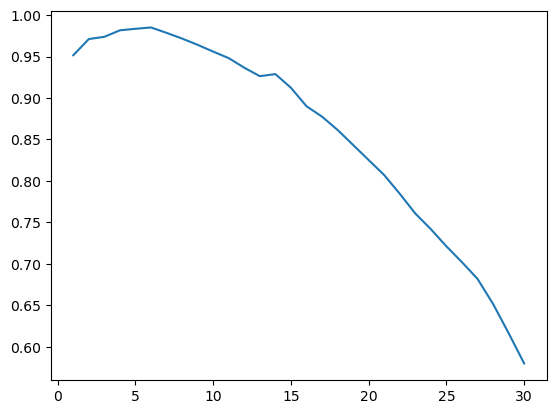

In [95]:
plt.plot(range(1,31), box)
plt.show()      
# 1-5정도 해야 적절할듯

In [96]:
model.n_neighbors = 3

In [97]:
model.score(test_scaled, test_y)

# 이 모델이 실제값을 97% 정도 설명한다

0.9737629273301106

In [98]:
pred = model.predict(test_scaled)

In [99]:
mean_absolute_error(test_y, pred)

40.68571428571429

In [100]:
mean_squared_error(test_y, pred) ** (1/2)

56.36261143926857

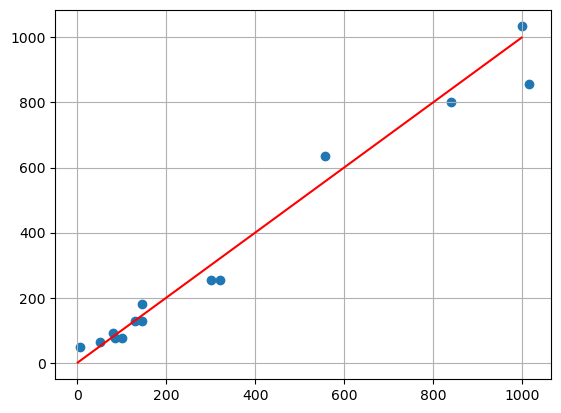

In [101]:
plt.scatter(test_y, pred)
plt.plot(range(1,1000), range(1,1000), color = "red")
plt.grid()
plt.show()

# 어느정도 맞는걸로 보인다

# 선형회귀

In [132]:
# 선형회귀
df = pd.read_csv("Data/perch.csv")
df

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


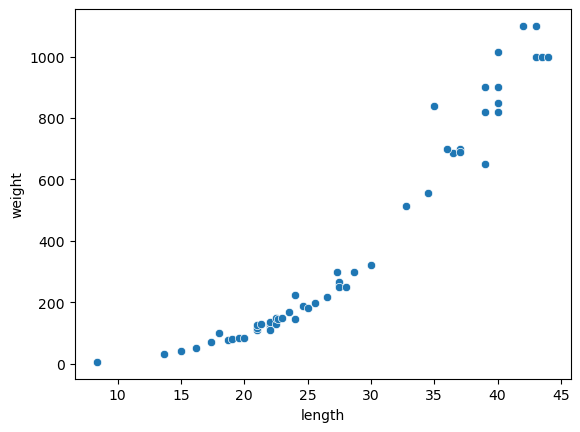

In [133]:
# K최근접의 단점 : 데이터가 크면 사용 X. 학습 범위를 벗어난 데이터를 예측 X (자기가 학습한 범위를 벗어나는 데이터가 들어오면 정확도가 급격히 낮아짐)

import seaborn as sns
sns.scatterplot(data=df, x = "length", y = "weight")
plt.show()

# 선형회귀로 이러한 문제 해결?

In [134]:
X = df[["length"]].values
Y = df["weight"]

train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [135]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.9158107204933028

In [136]:
model.coef_[0]          # 기울기값

36.53336082215813

In [137]:
model.intercept_          # 절편

-627.7055423910376

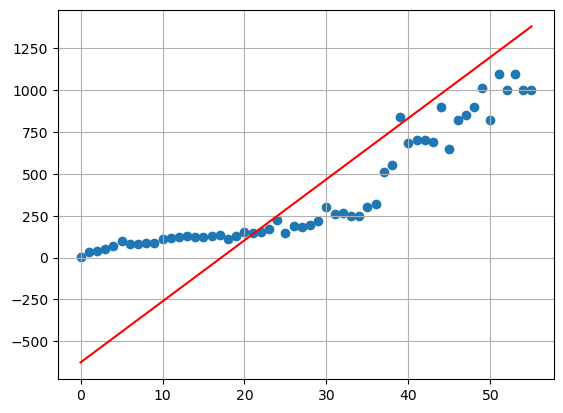

In [138]:
plt.scatter(range(len(df)), df["weight"])
plt.plot(range(len(df)), range(len(df)) * model.coef_[0] + model.intercept_, "red")     # x값에 대해 y=ax+b 선 그리기
plt.grid()
plt.show()

In [162]:
df = pd.read_csv("Data/perch.csv")
# df["2 X length"] = df["length"] * 2   # 파생변수 추가
df["length^2"] = df["length"] ** 2

# 문제집,정답지 만들기
X = df.drop("weight", axis = 1).values
Y = df["weight"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [163]:
model.coef_
# 기울기값이 2개 나옴

array([-23.70180119,   1.04998371])

In [164]:
model.intercept_

143.9086577615509

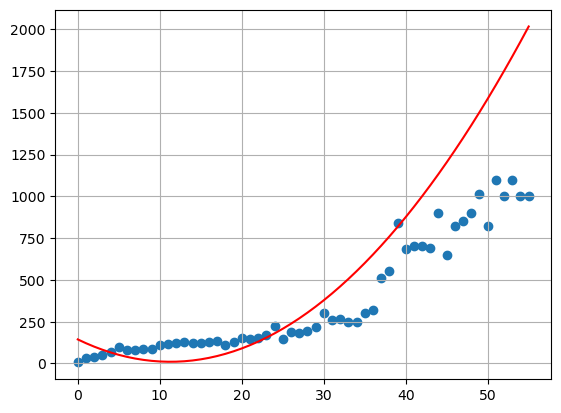

In [166]:
plt.scatter(range(len(df)), df["weight"])
plt.plot(range(len(df)), 
         range(len(df)) * model.coef_[0]  +  np.arange(len(df)) **2 * model.coef_[1] +  model.intercept_, "red")     # x값에 대해 y=ax+b 선 그리기
#                    길이특성             +  길이**2한 특성에 두번째기울기 곱해주기    +   절편
plt.grid()
plt.show()

# y = a길이 + 2b길이 + c  = (a+2b)길이 + c          # 곱하기로만 하면 특성을 하나 늘려도 직선밖에.

# 독립변수가 선형회귀와 상관관계가 높으면

In [167]:
perch = pd.read_csv("Data/perch2.csv")
perch.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


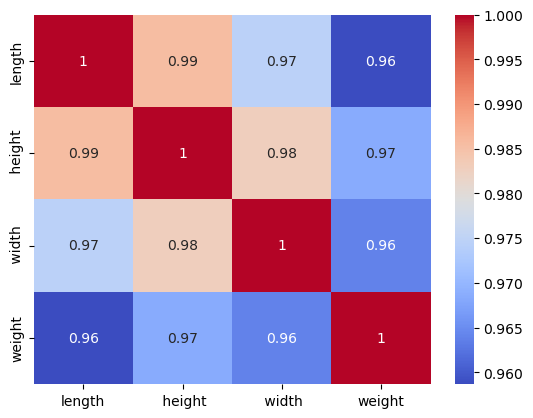

In [168]:
import seaborn as sns
corr = perch.corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()
# 대체적으로 상관관계가 종속변수 weight와 다 높게 나온다 

In [169]:
X = perch.drop("weight", axis=1)
Y = perch["weight"]

In [170]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [171]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [172]:
model = LinearRegression()     # 표준화된 훈련데이터로 학습
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)    # R^2

0.9547649568608305

In [173]:
pred = model.predict(test_scaled)
mean_absolute_error(test_y, pred)    # MAE

55.09186685535433

In [174]:
mean_squared_error(test_y, pred) ** (1/2)

75.14817994715953

In [175]:
model = LinearRegression()
model.fit(X, Y)      # 훈련데이터가아닌 전체 데이터에 대해 학습

LinearRegression()

In [176]:
model.coef_

array([ 2.9082713 , 67.20469902, 67.26029602])

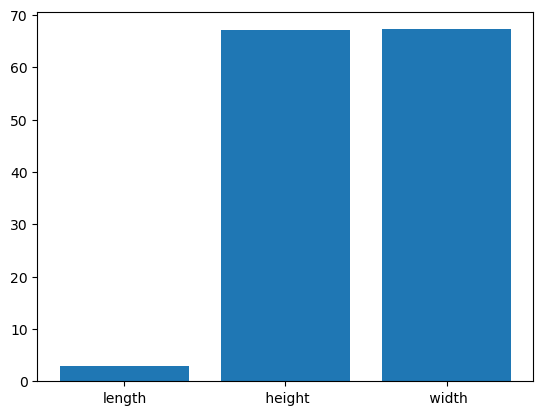

In [177]:
plt.bar(perch.columns[:-1], model.coef_)
plt.show()
# 선형회귀모델이 학습힐뗴 가장 큰 영향을 미친 요인은 height와 width였다

In [185]:
# 컴퓨터가 완벽한 선 그리지 못하게 방해할거임
# 릿지 회귀 : 오차식에 기울기의제곱의합에 알파(규제강도)를 곱한 다음 더한다

from sklearn.linear_model import Ridge, Lasso, ElasticNet          # 엘라스틱넷 : 릿지와 라쏘를 섞은것

model = Ridge(alpha = 1) # 릿지모델로 학습
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9578763620257009

In [186]:
# 라쏘 회귀 : 단순히 절댓값으로 기울기를 표현

model = Lasso(alpha = 1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9548768525096106

In [187]:
model.coef_           # 라쏘는 단순히 절댓값으로 보는거라서 기울기 0인거 있으면 제거도 해도된다

array([  0.        , 224.47280822, 105.32604202])

In [190]:
model = ElasticNet(alpha = 1, l1_ratio = 0.5)             # 알파값과 p값도 정해줄수있음
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9279084212324542